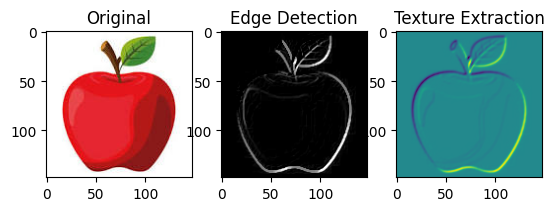

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('fru.jpeg')
image_mat= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

edges_x = cv2.filter2D(gray_image, -1, sobel_x)
edges_y = cv2.filter2D(gray_image, -1, sobel_y)

edges = cv2.addWeighted(edges_x, 0.5, edges_y, 0.5, 0)
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)          # To find edges_rgb we need sobel_x_y and edges_x_y


sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
texture=sobelx+sobely                                        # To find texture we need sobelx and sobely

l_title=["Original","Edge Detection","Texture Extraction"]
l_var=[image_mat,edges_rgb,texture]

fig,axs=plt.subplots(1,3)
for i in range(3):
    axs[i].imshow(l_var[i])
    axs[i].set_title(l_title[i])
